In [98]:
import pandas as pd
df = pd.read_csv('../data/dataset_rebalanced.csv')

In [99]:
df = df.replace({'Positive': 0, 'Negative': 1})

In [100]:
X = df.iloc[:,:-1]
y = pd.DataFrame(df['Sentiment'])

In [101]:
X

,ability,able,absolutely,access,according,account,accounts,active,add,added,...,world,worldfirst,worlds,worth,wow,wrong,yeah,year,years,yor
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
y

,Sentiment
0,1
1,1
2,1
3,1
4,1
...,...
999,0
1000,0
1001,0
1002,0


In [103]:
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np

selector = SelectKBest(f_classif, k=4)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


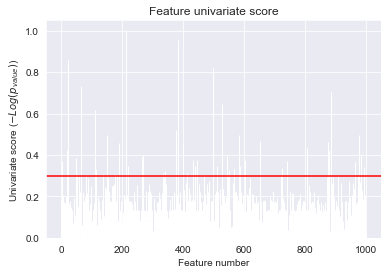

In [112]:
import matplotlib.pyplot as plt

X_indices = np.arange(X.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores,color = "", width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.axhline(y=0.3, color='r', linestyle='-')
plt.show()

In [9]:
sum(scores>0.3)

56

In [10]:
X = X.loc[:,X.columns[scores>0.3]]

In [11]:
X

,able,alert,amazing,avatar,awesome,battle,best,better,breakout,chance,...,successful,support,sure,team,war,wear,welcome,win,winners,wrong
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.32976,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.470914,0.0,0.0,0.427924,0.0
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.000000,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

h = 0.02  # step size in the mesh

names = [
    "Gradient Boosting",
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    GradientBoostingClassifier(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

def classification_report_csv(report,name):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row = {}
        row_data = line.split('      ')
        print(row_data[0])
        print(row_data[1])
        row['class'] = row_data[0]
        row['name'] = name
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])
        report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)
    dataframe.to_csv('classification_report.csv', index = False)


def training(train, name, test, fold_no, model, y_train, y_test):
    x_train = train
    x_test = test
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    plot_confusion_matrix(model, x_train,y_train)
    report = classification_report(y_test, y_pred, output_dict=True)
    #classification_report_csv(report,name)
    df = pd.DataFrame(report).transpose()
    df = pd.DataFrame(df.iloc[2,:]).transpose()
    df2 = pd.DataFrame()
    df2['Accuracy'] = df['precision']
    df2['Algorithm'] = name
    df2['FoldNo'] = fold_no
    df2.to_csv('classification_report.csv', mode='a', header=False,index = False)


for name, clf in zip(names, classifiers):
    print(name)
    skf = StratifiedKFold(n_splits=10)
    fold_no = 1
    for train_index,test_index in skf.split(X, y):
        train = X.iloc[train_index,:]
        test = X.iloc[test_index,:]
        y_train = y.iloc[train_index,:]
        y_test = y.iloc[test_index,:]
        training(train,name, test,fold_no, clf,y_train,y_test)
        fold_no += 1

In [115]:
import pickle
model = GaussianProcessClassifier(1.0 * RBF(1.0))
model.fit(train, y_train)
# save the model to disk
filename = 'gaussianProcess.pkl'
pickle.dump(model, open(filename, 'wb'))

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [116]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(test, y_test)
print(result)

0.78


In [61]:
df = pd.read_csv("classification_report.csv",names=["Accuracy","Algorithm","Fold"])

In [62]:
df

,Accuracy,Algorithm,Fold
0,0.722772,Gradient Boosting,1
1,0.742574,Gradient Boosting,2
2,0.762376,Gradient Boosting,3
3,0.742574,Gradient Boosting,4
4,0.710000,Gradient Boosting,5
...,...,...,...
105,0.680000,QDA,6
106,0.700000,QDA,7
107,0.650000,QDA,8
108,0.750000,QDA,9


In [72]:
dfgroup = (df.groupby(['Algorithm'], as_index=False)).mean()

In [82]:
dfgroup2 = (df.groupby(['Algorithm'], as_index=False)).std()

In [73]:
dfgroup

,Algorithm,Accuracy,Fold
0,AdaBoost,0.745069,5.5
1,Decision Tree,0.580693,5.5
2,Gaussian Process,0.780891,5.5
3,Gradient Boosting,0.751030,5.5
4,Linear SVM,0.646020,5.5
5,Naive Bayes,0.726059,5.5
6,Nearest Neighbors,0.764921,5.5
7,Neural Net,0.778921,5.5
8,QDA,0.705158,5.5
9,RBF SVM,0.761970,5.5


In [74]:
dfgroup.to_csv('classification_average.csv',index = False)

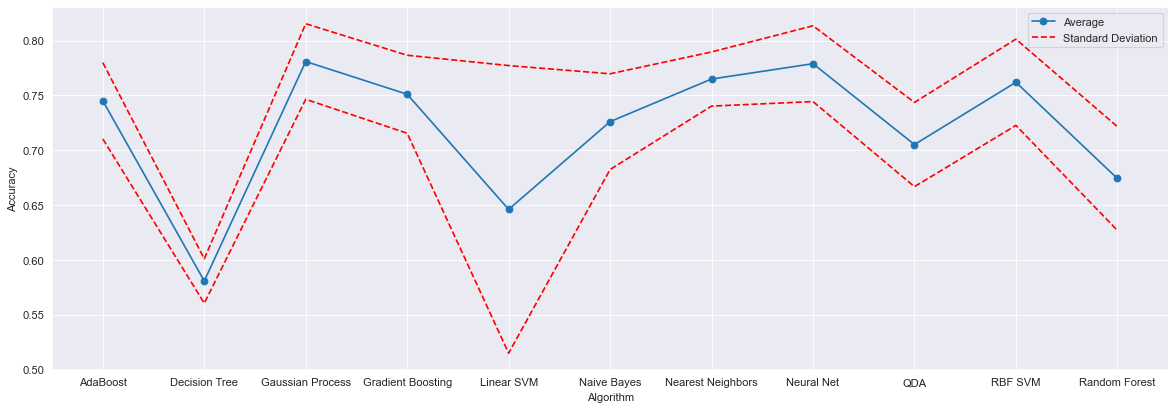

In [93]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(18, 6), dpi=80)
plt.plot(dfgroup['Algorithm'],dfgroup['Accuracy'],marker="o")
plt.plot(dfgroup['Algorithm'],dfgroup['Accuracy']+dfgroup2['Accuracy'],"r--")
plt.plot(dfgroup['Algorithm'],dfgroup['Accuracy']-dfgroup2['Accuracy'],'r--')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.legend(["Average","Standard Deviation"])
plt.show()